In [39]:
import pandas as pd
import frust.vis as vis

In [40]:
conversion_factor       =  627.509474
dimer_dft               = -834847.294
HBpin_dft               = -258305.91711374212
H2_dft                  = -737.1088023791428

# tests
#dimer_dft = -782.828844 * conversion_factor # The methyl dimer
#dimer_dft = -782.848448 * conversion_factor # The bridged methyl dimer

dimer_xtb               = -97.050557670754 * conversion_factor
HBpin_xtb               = -28.947535986441 * conversion_factor
H2_xtb                  = -0.9826859256890 * conversion_factor

# TS3

In [41]:
df_ts3 = pd.read_parquet("../scripts/results_ts3_TMP_font_1/ts3_TMP_font_1.parquet").drop(columns=["DFT-wB97X-D3-6-31G**-OptTS-vibs", "DFT-pre-Opt-wB97X-D3-6-31G**-Freq-vibs"])
df_lig = pd.read_parquet(
    "output_files/font_ligs.parquet",
    columns=[
        "ligand_name",
        "xtb-gfn-opt-electronic_energy",
        "orca-wB97X-D3-6-31G**-Freq-electronic_energy",
        "orca-wB97X-D3-6-31G**-Freq-gibbs_energy",
        "orca-wB97X-D3-6-31+G**-NoSym-electronic_energy",
    ],
)

key = "ligand_name"
df_lig = df_lig.rename(columns=lambda c: c if c == key else f"{c}_lig")
df = df_ts3.merge(df_lig, on='ligand_name', how='left', suffixes=('_ts', '_lig'))
energy_cols = [col for col in df.columns if 'energy' in col]
df[energy_cols] = df[energy_cols] * conversion_factor
coords_cols = [col for col in df.columns if 'coords' in col]
df = df.drop(columns=coords_cols)

In [42]:
df["lig_G_corr"] = df["orca-wB97X-D3-6-31G**-Freq-gibbs_energy_lig"] - df["orca-wB97X-D3-6-31G**-Freq-electronic_energy_lig"]
df["lig_G"] = df["orca-wB97X-D3-6-31+G**-NoSym-electronic_energy_lig"] + df["lig_G_corr"]

df["G_corr"] = df["DFT-wB97X-D3-6-31G**-OptTS-gibbs_energy"] - df["DFT-wB97X-D3-6-31G**-OptTS-electronic_energy"]
df["G_ts3"] = df["DFT-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy"] + df["G_corr"]

df["dG"] = (2 * (df["G_ts3"] - df["lig_G"] - HBpin_dft + H2_dft) - dimer_dft) / 2
df["dE"] = (2 * (df["xtb-gfn-opt-electronic_energy"] - df["xtb-gfn-opt-electronic_energy_lig"] - HBpin_xtb + H2_xtb) - dimer_xtb) / 2

df_ts3_e = df[["ligand_name", "rpos", "dG"]]
df.sort_values(by="ligand_name")

,custom_name,ligand_name,rpos,constraint_atoms,cid,smiles,atoms,energy_uff,xtb-gfnff-opt-electronic_energy,xtb-gfnff-opt-normal_termination,...,xtb-gfn-opt-electronic_energy_lig,orca-wB97X-D3-6-31G**-Freq-electronic_energy_lig,orca-wB97X-D3-6-31G**-Freq-gibbs_energy_lig,orca-wB97X-D3-6-31+G**-NoSym-electronic_energy_lig,lig_G_corr,lig_G,G_corr,G_ts3,dG,dE
0,TS3(1-methylindole_rpos(5)),1-methylindole,5,"[10, 12, 11, 41, 40, 67]",182,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",6.685075e+06,-8486.791929,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,403.931579,-9.278113e+05,20.373574,19.661232
1,TS3(1-methylindole_rpos(7)),1-methylindole,7,"[10, 12, 11, 41, 40, 69]",81,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",5.654300e+06,-8482.758617,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,406.698569,-9.278062e+05,25.450590,19.089757
2,TS3(1-methylindole_rpos(8)),1-methylindole,8,"[10, 12, 11, 41, 40, 70]",158,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",6.416620e+06,-8478.403529,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,404.936139,-9.278145e+05,17.142981,15.797896
3,TS3(1-methylindole_rpos(9)),1-methylindole,9,"[10, 12, 11, 41, 40, 71]",199,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",6.298833e+06,-8485.400998,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,404.993218,-9.278122e+05,19.421268,14.840246
4,TS3(1-methylpyrrole_rpos(2)),1-methylpyrrole,2,"[10, 12, 11, 41, 40, 64]",159,CN1C=CC=C1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",5.884121e+06,-7611.834343,True,...,-10785.827458,-156510.401246,-156458.233204,-156523.524775,52.168042,-156471.356733,377.086478,-8.314464e+05,17.407736,14.775664
5,TS3(1-methylpyrrole_rpos(3)),1-methylpyrrole,3,"[10, 12, 11, 41, 40, 65]",217,CN1C=CC=C1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",5.072968e+06,-7604.422417,True,...,-10785.827458,-156510.401246,-156458.233204,-156523.524775,52.168042,-156471.356733,376.350161,-8.314450e+05,18.856019,18.580886
6,"TS3(2,3-dihydrothieno[3,4-b][1,4]dioxine_rpos(1))","2,3-dihydrothieno[3,4-b][1,4]dioxine",1,"[10, 12, 11, 41, 40, 63]",65,C12=CSC=C1OCCO2,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",6.843803e+06,-7735.308344,True,...,-17113.307245,-489911.428368,-489859.550703,-489926.763646,51.877665,-489874.885981,377.361817,-1.164853e+06,14.500339,15.289563
9,TS3(2-methoxyfuran_rpos(5)),2-methoxyfuran,5,"[10, 12, 11, 41, 40, 67]",102,COC1=CC=CO1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",6.645045e+06,-7564.530560,True,...,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,370.375445,-8.910913e+05,12.663760,14.635726
8,TS3(2-methoxyfuran_rpos(4)),2-methoxyfuran,4,"[10, 12, 11, 41, 40, 66]",20,COC1=CC=CO1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",6.580114e+06,-7548.729221,True,...,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,371.785657,-8.910838e+05,20.203287,18.865038
7,TS3(2-methoxyfuran_rpos(3)),2-methoxyfuran,3,"[10, 12, 11, 41, 40, 65]",110,COC1=CC=CO1,"[C, C, C, C, C, C, H, H, H, H, B, H, N, C, C, ...",4.662037e+06,-7543.885389,True,...,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,370.759530,-8.910880e+05,16.038213,18.061610


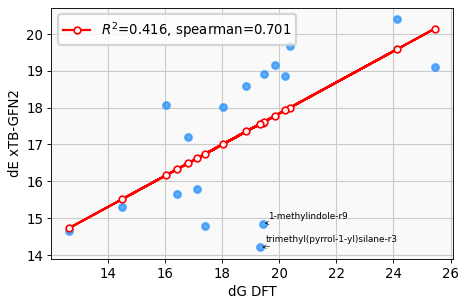

In [43]:
vis.plot_regression_outliers(df)

In [44]:
from frust.utils.analytics import build_annotated_frame
from IPython.display import HTML
_, html = build_annotated_frame(df, energy_col="dG", output_path="TS3_DFT_font_preliminary.html")
HTML(html)

# TS4 

In [45]:
df_ts4 = pd.read_parquet("../scripts/results_ts4_TMP_font_1/ts4_TMP_font_1.parquet").drop(columns=["DFT-wB97X-D3-6-31G**-OptTS-vibs", "DFT-pre-Opt-wB97X-D3-6-31G**-Freq-vibs"])
df_lig = pd.read_parquet(
    "output_files/font_ligs.parquet",
    columns=[
        "ligand_name",
        "xtb-gfn-opt-electronic_energy",
        "orca-wB97X-D3-6-31G**-Freq-electronic_energy",
        "orca-wB97X-D3-6-31G**-Freq-gibbs_energy",
        "orca-wB97X-D3-6-31+G**-NoSym-electronic_energy",
    ],
)

key = "ligand_name"
df_lig = df_lig.rename(columns=lambda c: c if c == key else f"{c}_lig")
df = df_ts4.merge(df_lig, on='ligand_name', how='left', suffixes=('_ts', '_lig'))
energy_cols = [col for col in df.columns if 'energy' in col]
df[energy_cols] = df[energy_cols] * conversion_factor
coords_cols = [col for col in df.columns if 'coords' in col]
df = df.drop(columns=coords_cols)

In [46]:
df["lig_G_corr"] = df["orca-wB97X-D3-6-31G**-Freq-gibbs_energy_lig"] - df["orca-wB97X-D3-6-31G**-Freq-electronic_energy_lig"]
df["lig_G"] = df["orca-wB97X-D3-6-31+G**-NoSym-electronic_energy_lig"] + df["lig_G_corr"]

df["G_corr"] = df["DFT-wB97X-D3-6-31G**-OptTS-gibbs_energy"] - df["DFT-wB97X-D3-6-31G**-OptTS-electronic_energy"]
df["G_ts3"] = df["DFT-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy"] + df["G_corr"]

df["dG"] = (2 * (df["G_ts3"] - df["lig_G"] - HBpin_dft + H2_dft) - dimer_dft) / 2
df["dE"] = (2 * (df["xtb-gfn-opt-electronic_energy"] - df["xtb-gfn-opt-electronic_energy_lig"] - HBpin_xtb + H2_xtb) - dimer_xtb) / 2

df_ts4_e = df[["ligand_name", "rpos", "dG"]]
df.sort_values(by="ligand_name")

,custom_name,ligand_name,rpos,constraint_atoms,cid,smiles,atoms,energy_uff,xtb-gfnff-opt-electronic_energy,xtb-gfnff-opt-normal_termination,...,xtb-gfn-opt-electronic_energy_lig,orca-wB97X-D3-6-31G**-Freq-electronic_energy_lig,orca-wB97X-D3-6-31G**-Freq-gibbs_energy_lig,orca-wB97X-D3-6-31+G**-NoSym-electronic_energy_lig,lig_G_corr,lig_G,G_corr,G_ts3,dG,dE
0,TS4(1-methylindole_rpos(4)),1-methylindole,4,"[11, 10, 12, 61, 55, 66]",31,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",2.196064e+06,-8484.118149,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,403.424347,-9.278040e+05,27.596534,18.725639
1,TS4(1-methylindole_rpos(5)),1-methylindole,5,"[11, 10, 12, 61, 55, 67]",44,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",2.447477e+06,-8484.720714,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,403.855096,-9.278078e+05,23.862665,18.098755
2,TS4(1-methylindole_rpos(6)),1-methylindole,6,"[11, 10, 12, 61, 55, 68]",123,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",3.145564e+06,-8484.626855,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,404.080097,-9.278073e+05,24.350410,17.218500
3,TS4(1-methylindole_rpos(7)),1-methylindole,7,"[11, 10, 12, 61, 55, 69]",141,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",3.809554e+06,-8483.909998,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,404.829152,-9.278051e+05,26.486184,17.304369
4,TS4(1-methylindole_rpos(8)),1-methylindole,8,"[11, 10, 12, 61, 55, 70]",53,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",3.317619e+06,-8485.359025,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,404.617016,-9.278191e+05,12.565253,11.024149
5,TS4(1-methylindole_rpos(9)),1-methylindole,9,"[11, 10, 12, 61, 55, 71]",18,CN1C2=C(C=CC=C2)C=C1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",1.937271e+06,-8487.319618,True,...,-16809.979099,-252901.357120,-252821.433787,-252919.093314,79.923333,-252839.169981,404.074331,-9.278103e+05,21.289363,11.977559
6,TS4(1-methylpyrrole_rpos(2)),1-methylpyrrole,2,"[11, 10, 12, 61, 55, 64]",112,CN1C=CC=C1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",1.902866e+06,-7611.926176,True,...,-10785.827458,-156510.401246,-156458.233204,-156523.524775,52.168042,-156471.356733,376.542226,-8.314490e+05,14.818576,9.877112
7,TS4(1-methylpyrrole_rpos(3)),1-methylpyrrole,3,"[11, 10, 12, 61, 55, 65]",88,CN1C=CC=C1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",2.495056e+06,-7609.248743,True,...,-10785.827458,-156510.401246,-156458.233204,-156523.524775,52.168042,-156471.356733,376.114280,-8.314477e+05,16.070487,13.642221
8,"TS4(2,3-dihydrothieno[3,4-b][1,4]dioxine_rpos(1))","2,3-dihydrothieno[3,4-b][1,4]dioxine",1,"[11, 10, 12, 61, 55, 63]",45,C12=CSC=C1OCCO2,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",2.948850e+06,-7731.282145,True,...,-17113.307245,-489911.428368,-489859.550703,-489926.763646,51.877665,-489874.885981,376.435914,-1.164851e+06,15.984050,12.596208
11,TS4(2-methoxyfuran_rpos(5)),2-methoxyfuran,5,"[11, 10, 12, 61, 55, 67]",100,COC1=CC=CO1,"[C, C, C, C, C, C, H, H, H, H, N, B, H, C, C, ...",3.159229e+06,-7558.217587,True,...,-13729.117474,-216146.835578,-216099.945953,-216158.428382,46.889624,-216111.538758,370.316180,-8.910926e+05,11.436219,15.064066


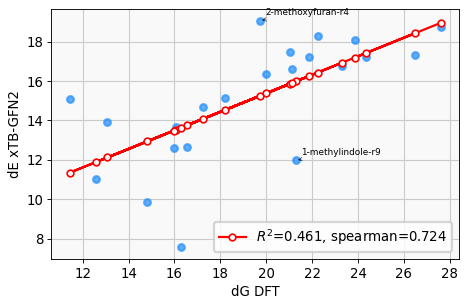

In [47]:
vis.plot_regression_outliers(df)

In [48]:
from frust.utils.analytics import build_annotated_frame
from IPython.display import HTML
_, html = build_annotated_frame(df, energy_col="dG", output_path="TS4_DFT_font_preliminary.html")
HTML(html)

In [49]:
df = df_ts3_e.merge(df_ts4_e, "left", ["ligand_name", "rpos"], suffixes=["_ts3", "_ts4"])
df

,ligand_name,rpos,dG_ts3,dG_ts4
0,1-methylindole,5,20.373574,23.862665
1,1-methylindole,7,25.450590,26.486184
2,1-methylindole,8,17.142981,12.565253
3,1-methylindole,9,19.421268,21.289363
4,1-methylpyrrole,2,17.407736,14.818576
5,1-methylpyrrole,3,18.856019,16.070487
6,"2,3-dihydrothieno[3,4-b][1,4]dioxine",1,14.500339,15.984050
7,2-methoxyfuran,3,16.038213,13.074657
8,2-methoxyfuran,4,20.203287,19.720399
9,2-methoxyfuran,5,12.663760,11.436219


In [50]:
df['dG_highest'] = df[['dG_ts3', 'dG_ts4']].max(axis=1)
df['Step'] = df.apply(lambda row: 'ts3' if row['dG_ts3'] >= row['dG_ts4'] else 'ts4', axis=1)
df

,ligand_name,rpos,dG_ts3,dG_ts4,dG_highest,Step
0,1-methylindole,5,20.373574,23.862665,23.862665,ts4
1,1-methylindole,7,25.450590,26.486184,26.486184,ts4
2,1-methylindole,8,17.142981,12.565253,17.142981,ts3
3,1-methylindole,9,19.421268,21.289363,21.289363,ts4
4,1-methylpyrrole,2,17.407736,14.818576,17.407736,ts3
5,1-methylpyrrole,3,18.856019,16.070487,18.856019,ts3
6,"2,3-dihydrothieno[3,4-b][1,4]dioxine",1,14.500339,15.984050,15.984050,ts4
7,2-methoxyfuran,3,16.038213,13.074657,16.038213,ts3
8,2-methoxyfuran,4,20.203287,19.720399,20.203287,ts3
9,2-methoxyfuran,5,12.663760,11.436219,12.663760,ts3
